In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# data
x = list(range(0, 60, 1))
data = pd.read_csv("2-4-75.csv", index_col=False)
ell = data['ell'].to_list()

In [3]:
# font size
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=16)
plt.rc('axes', titlesize=18)
plt.rc('text', usetex=True)
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['text.latex.preamble'] = [
    r'\usepackage{tgheros}',    # helvetica font
    r'\usepackage{sansmath}',   # math-font matching helvetica
    r'\sansmath'                # actually tell tex to use it!
    r'\usepackage{siunitx}',    # micro symbols
    r'\sisetup{detect-all}',    # force siunitx to use the fonts
]

<ipython-input-3-b3fe6e799c48>:9: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [


<ipython-input-4-175dcc500082>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


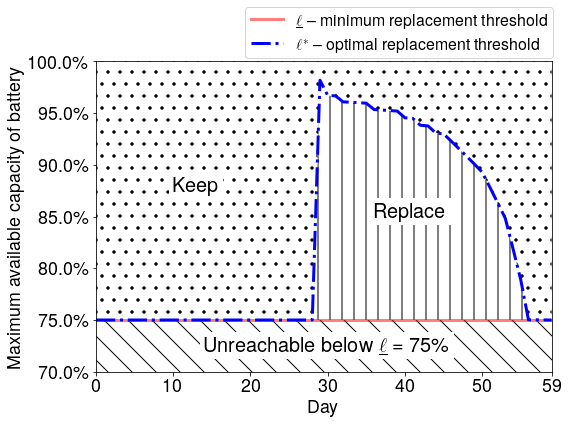

In [4]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
# threshold
ax.plot(
    x, [0.75] * len(x), linestyle='-', linewidth=3, color='red', alpha=0.5,
    label=r'$\underline{\ell}$' + ' -- minimum replacement threshold' 
)
# optimal policy
ax.plot(
    x, ell, linestyle='-.', linewidth=3, color='blue',
    label=r'$\ell^*$' + ' -- optimal replacement threshold '
)
# fill with shade -- Replace
ax.fill_between(
    x, [0.75] * len(x), ell,
    facecolor='w', hatch = '|'
)
ax.text(
    36, 0.85, 'Replace', fontsize=20,
    bbox = dict(facecolor = 'w', alpha = 1.0, linewidth=0)
)
# fill with shade -- Keep
ax.fill_between(
    x, [1.00] * len(x), ell,
    facecolor='w', hatch = '.'
)
ax.text(
    10, 0.875, 'Keep', fontsize=20,
    bbox = dict(facecolor = 'w', alpha = 1.0, linewidth=0)
)
# fill with shade -- Bottom
ax.fill_between(
    x, [0.70] * len(x), [0.75] * len(x),
    facecolor='w', hatch = '\\'
)
ax.text(
    14, 0.72, r'Unreachable below $\underline{\ell}=75\%$', fontsize=20,
    bbox = dict(facecolor = 'w', alpha = 1.0, linewidth=0)
)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.set_ylim(0.70, 1.00)
ax.set_xlim(0, 59)
ax.set_xticks([0, 10, 20, 30, 40, 50, 59])
ax.set_xlabel("Day")
ax.set_ylabel("Maximum available capacity of battery")
ax.legend(loc=(0.327, 1.01))
fig.tight_layout()
fig.show()
fig.savefig("2-4-75.png", dpi=600)
fig.savefig("2-4-75_red.png", dpi=100)